In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

In [2]:
train_dataset = pd.read_csv(r'C:\Users\Saravanan\Documents\Interview Projects\House Price Prediction Project\HP atom File Folder\datasets\train.csv')
test_dataset = pd.read_csv(r'C:\Users\Saravanan\Documents\Interview Projects\House Price Prediction Project\HP atom File Folder\datasets\test.csv')

In [3]:
datasets = [train_dataset,test_dataset]

In [4]:
train_columns = train_dataset.columns.tolist()

In [5]:
train_columns

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [6]:
train_dataset.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

# EDA

<AxesSubplot:title={'center':'MSSubclass'}>

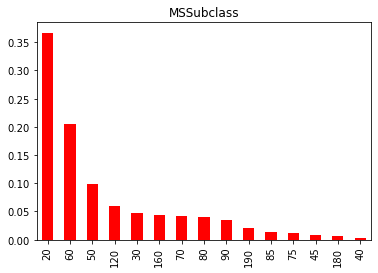

In [7]:
train_dataset.MSSubClass.value_counts(normalize=True).plot.bar(color="Red",title="MSSubclass")

([<matplotlib.axis.XTick at 0x264238bbc40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

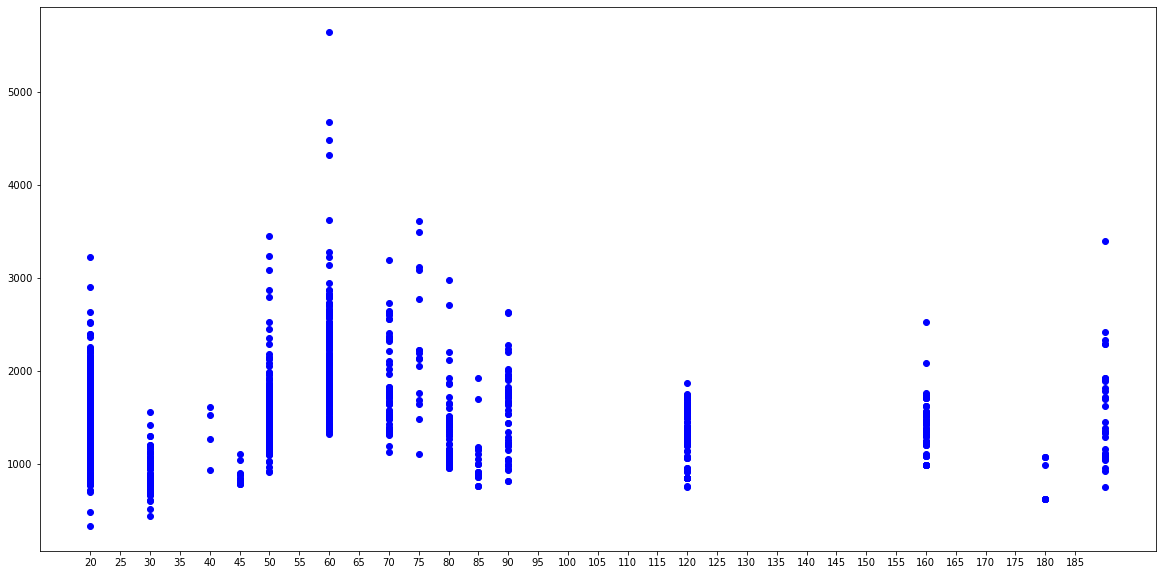

In [8]:
plt.figure(figsize=(20,10))
plt.scatter(train_dataset['MSSubClass'],train_dataset['GrLivArea'],color="Blue")
max_subclass = max(train_dataset['MSSubClass'])
plt.xticks(np.arange(min(train_dataset['MSSubClass']),max(train_dataset['MSSubClass']),5))

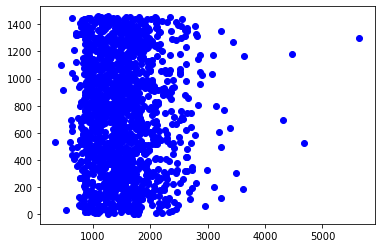

In [9]:
plt.scatter(train_dataset['GrLivArea'],train_dataset['Id'],color="Blue")

Text(0, 0.5, 'Living Area in Sq.ft')

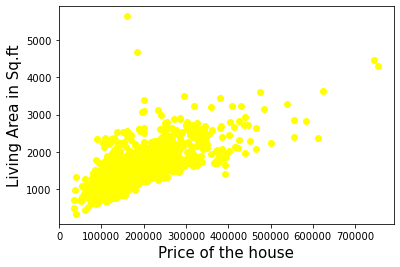

In [10]:
plt.scatter(train_dataset['SalePrice'],train_dataset['GrLivArea'],color="yellow")
plt.xlabel("Price of the house",fontsize=15)
plt.ylabel("Living Area in Sq.ft",fontsize=15)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

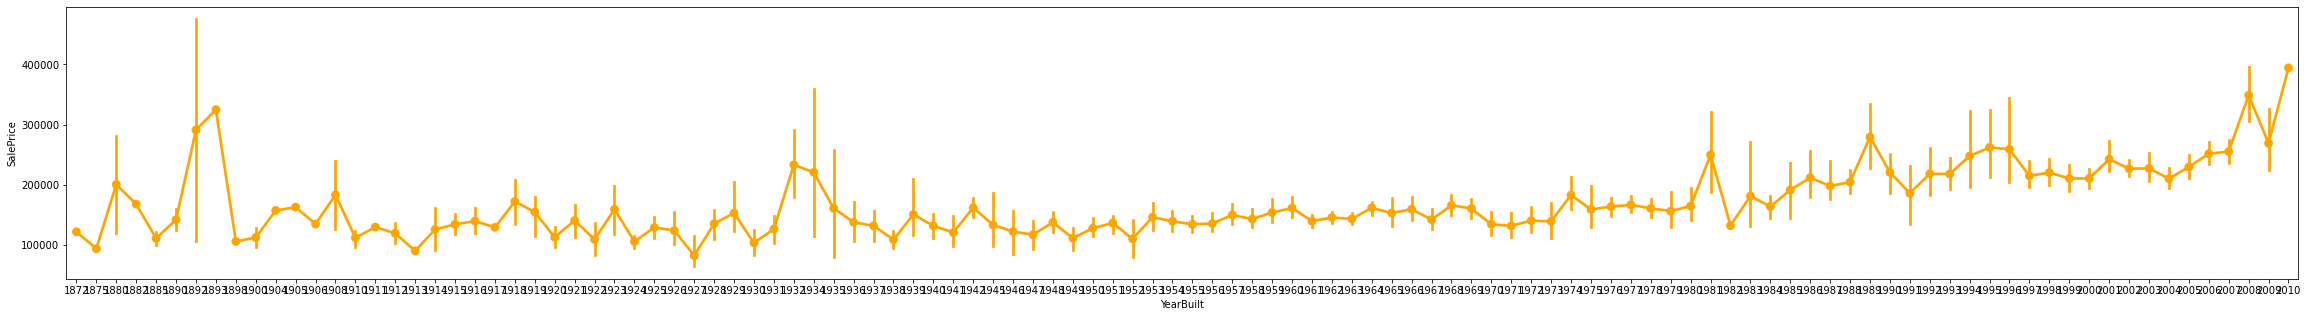

In [11]:
plt.figure(figsize=(40,5))
sns.pointplot(x="YearBuilt",y="SalePrice",data=train_dataset,color="orange")

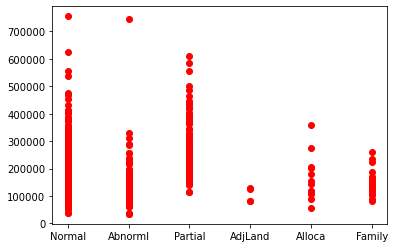

In [12]:
plt.scatter(train_dataset['SaleCondition'], train_dataset['SalePrice'],color="red")

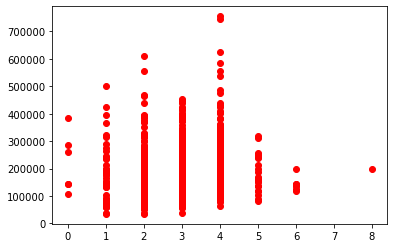

In [13]:
plt.scatter(train_dataset['BedroomAbvGr'],train_dataset['SalePrice'],color="red")

<AxesSubplot:xlabel='SalePrice', ylabel='GarageArea'>

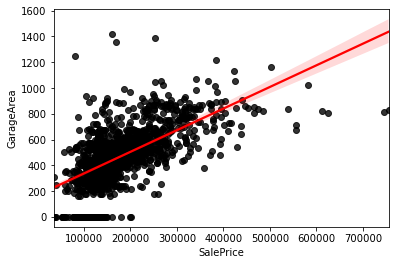

In [14]:
 #plt.scatter(train_dataset['GarageArea'],train_dataset['SalePrice'],color="black")
sns.regplot(x = 'SalePrice',y = 'GarageArea', data=train_dataset,scatter_kws={"color": "black"}, line_kws={"color": "red"})

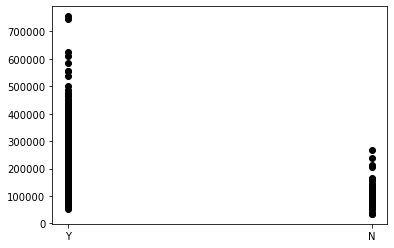

In [15]:
plt.scatter(train_dataset['CentralAir'],train_dataset['SalePrice'],color="black")

In [16]:
round(train_dataset.groupby('CentralAir').SalePrice.mean())

CentralAir
N    105264.0
Y    186187.0
Name: SalePrice, dtype: float64

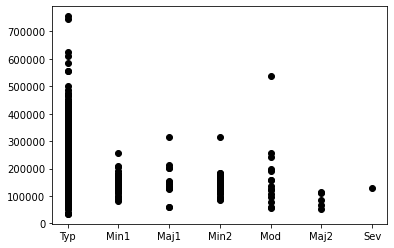

In [17]:
plt.scatter(train_dataset['Functional'],train_dataset['SalePrice'],color="black")

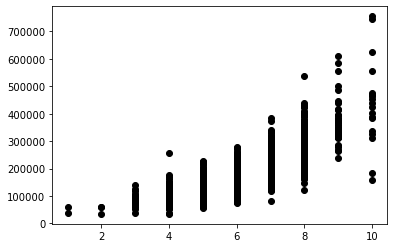

In [18]:
plt.scatter(train_dataset['OverallQual'],train_dataset['SalePrice'],color="black")

c:\users\saravanan\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


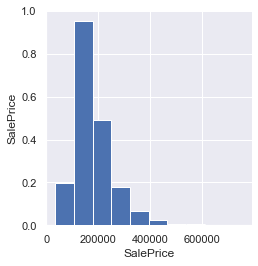

In [19]:
sublist = []
for i in range(1,82,8):
    sublist.append(i)

    
col1 = train_columns[sublist[1]:sublist[2]]
col1.append('SalePrice')

sns.set()
sns.pairplot(train_dataset[col1],size=3.5)

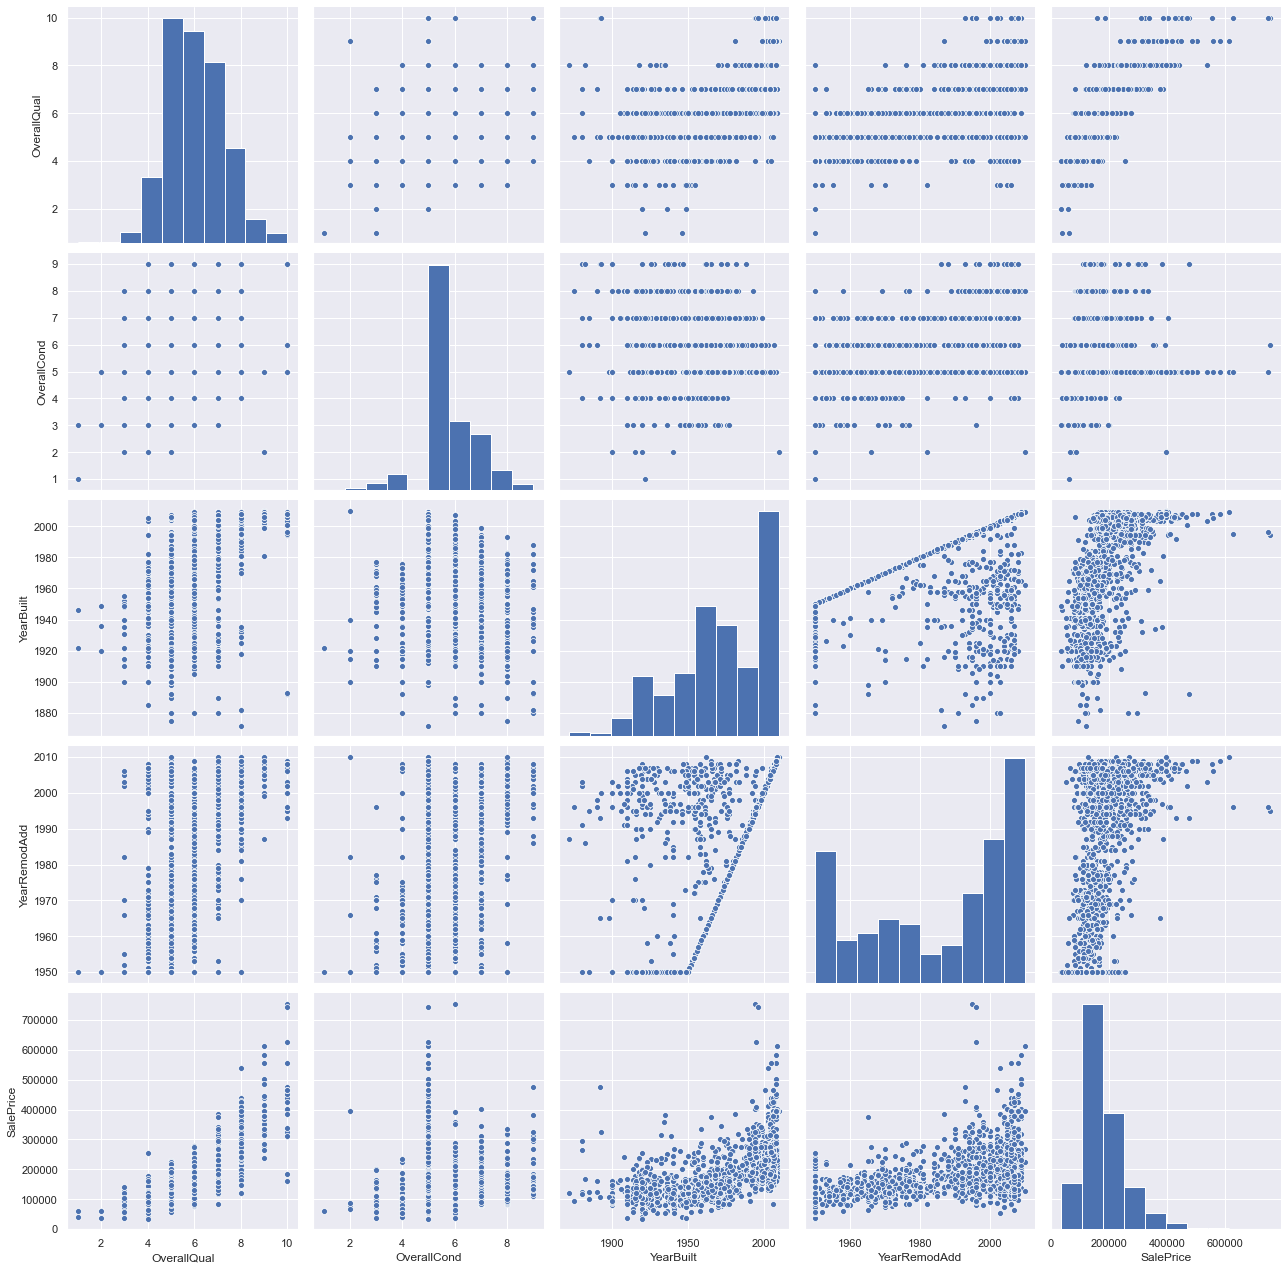

In [20]:
col2 = train_columns[sublist[2]:sublist[3]]
col2.append('SalePrice')

sns.set()
sns.pairplot(train_dataset[col2],size=3.5)

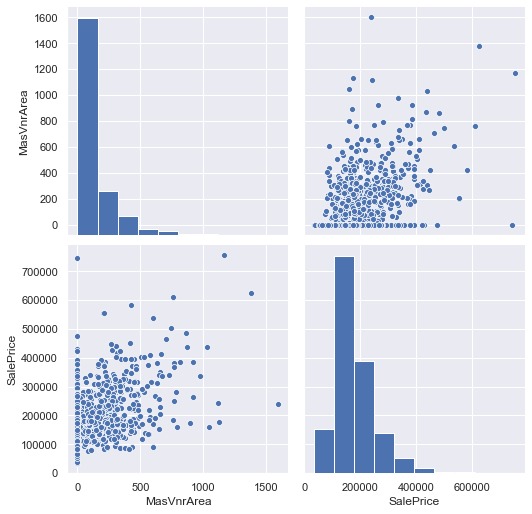

In [21]:
col3 = train_columns[sublist[3]:sublist[4]]
col3.append('SalePrice')

sns.set()
sns.pairplot(train_dataset[col3],size=3.5)

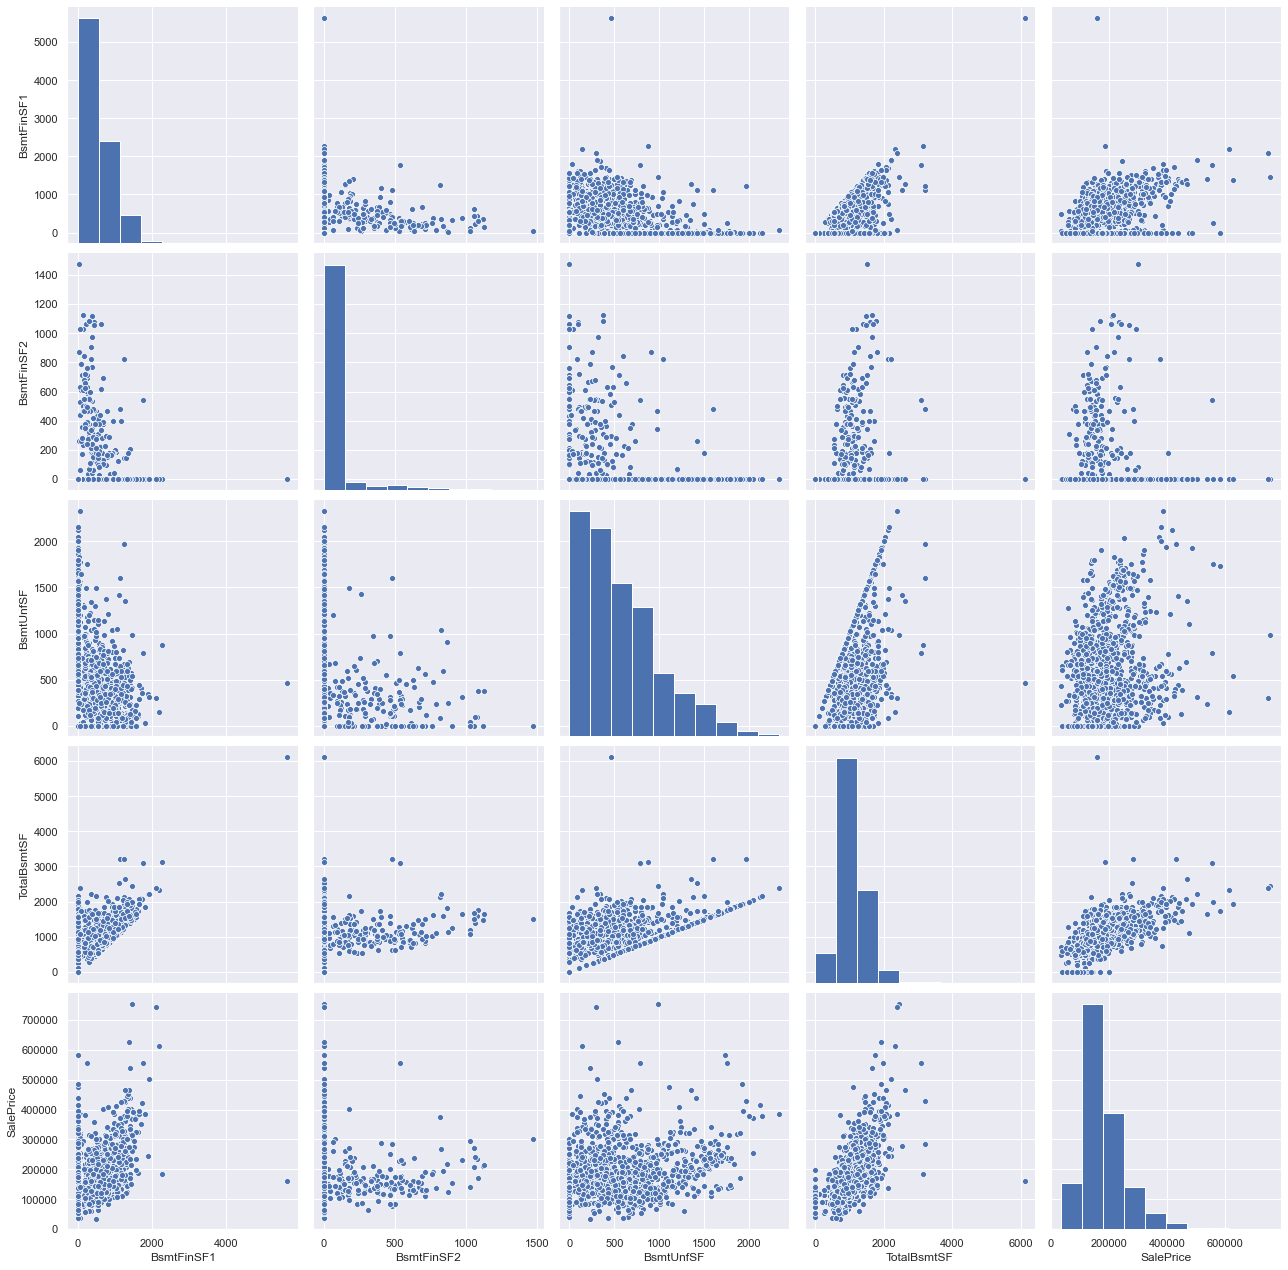

In [22]:
col4 = train_columns[sublist[4]:sublist[5]]
col4.append('SalePrice')

sns.set()
sns.pairplot(train_dataset[col4],size=3.5)

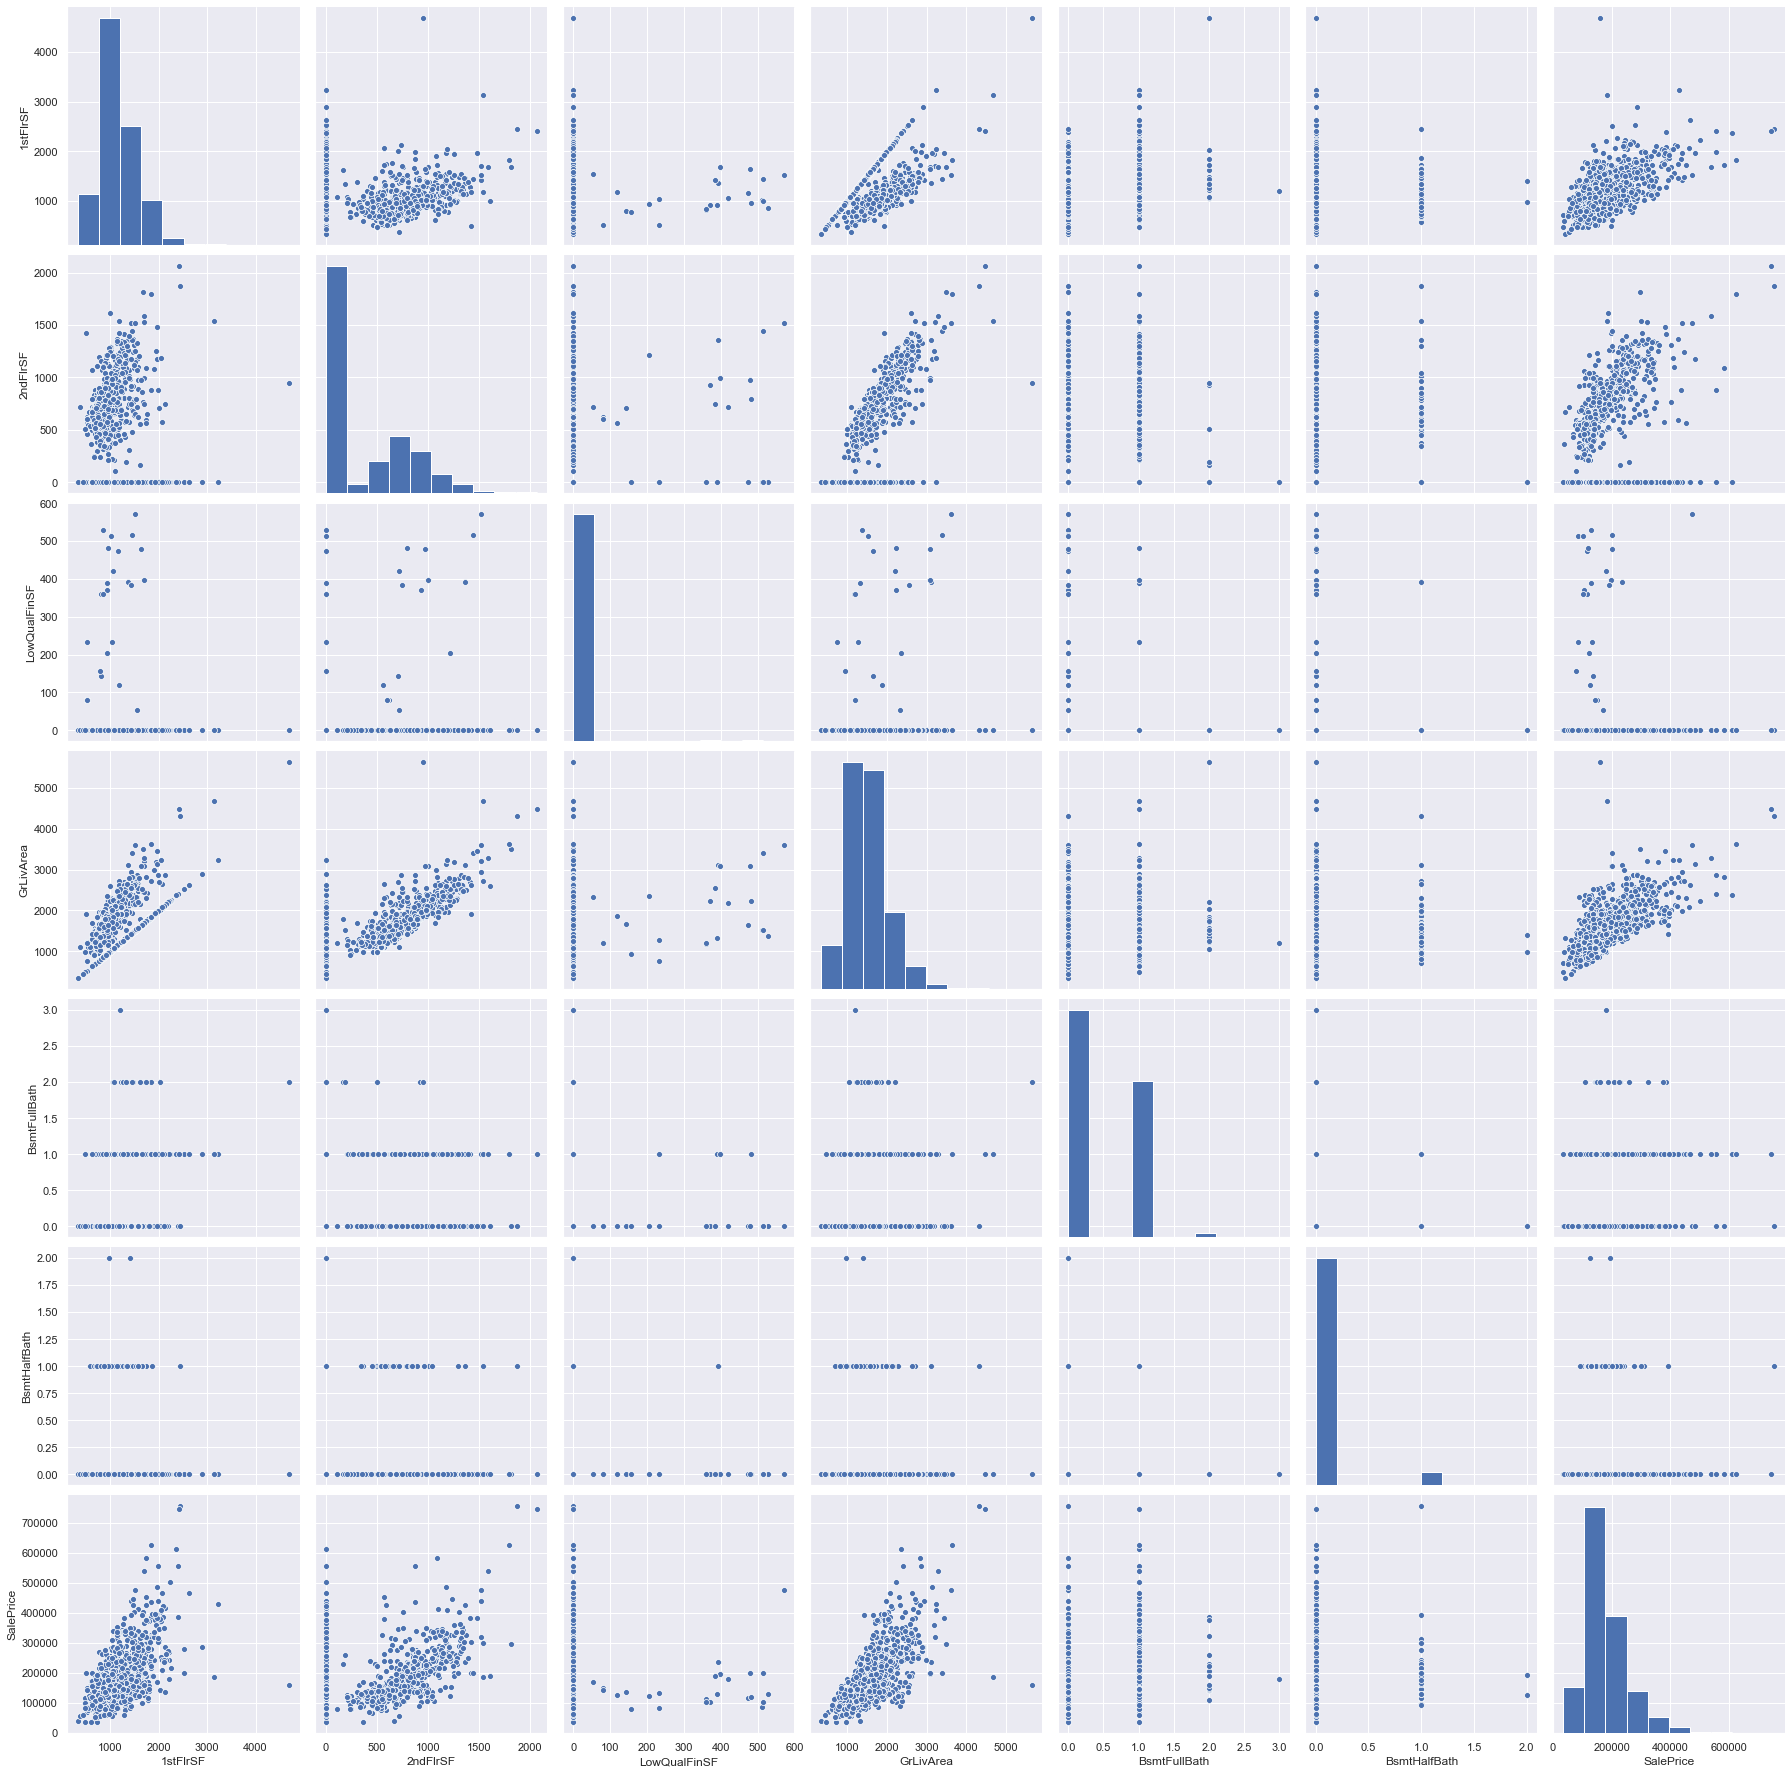

In [23]:
col5 = train_columns[sublist[5]:sublist[6]]
col5.append('SalePrice')

sns.set()
sns.pairplot(train_dataset[col5],size=3.5)

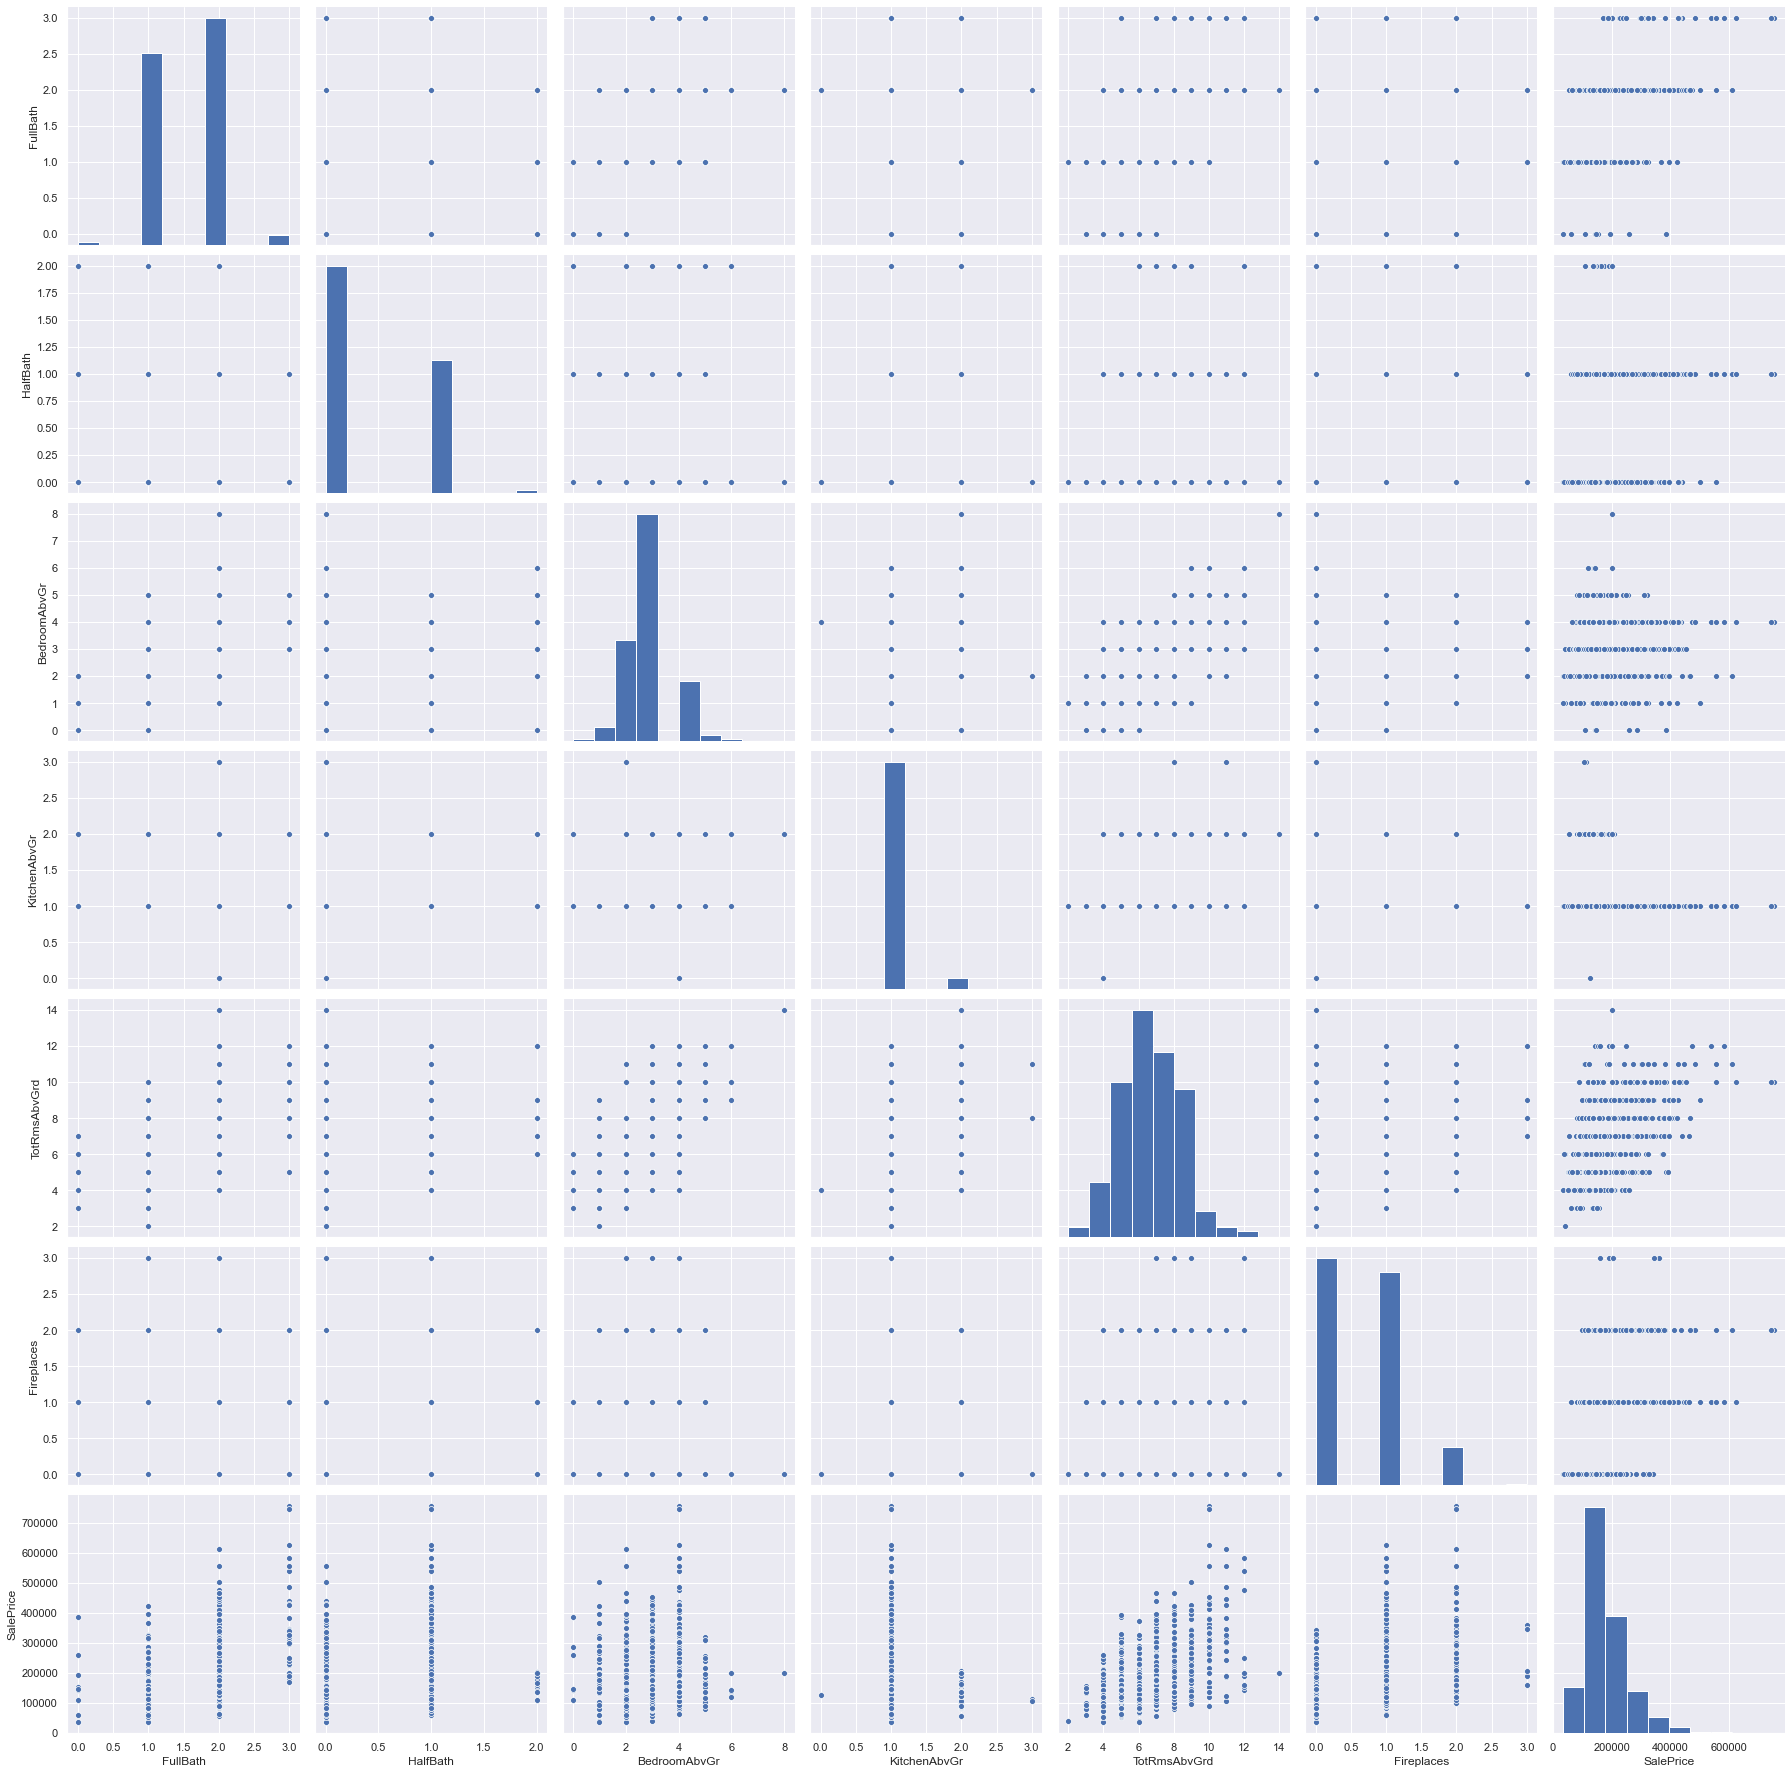

In [24]:
col6 = train_columns[sublist[6]:sublist[7]]
col6.append('SalePrice')

sns.set()
sns.pairplot(train_dataset[col6],size=3.5)

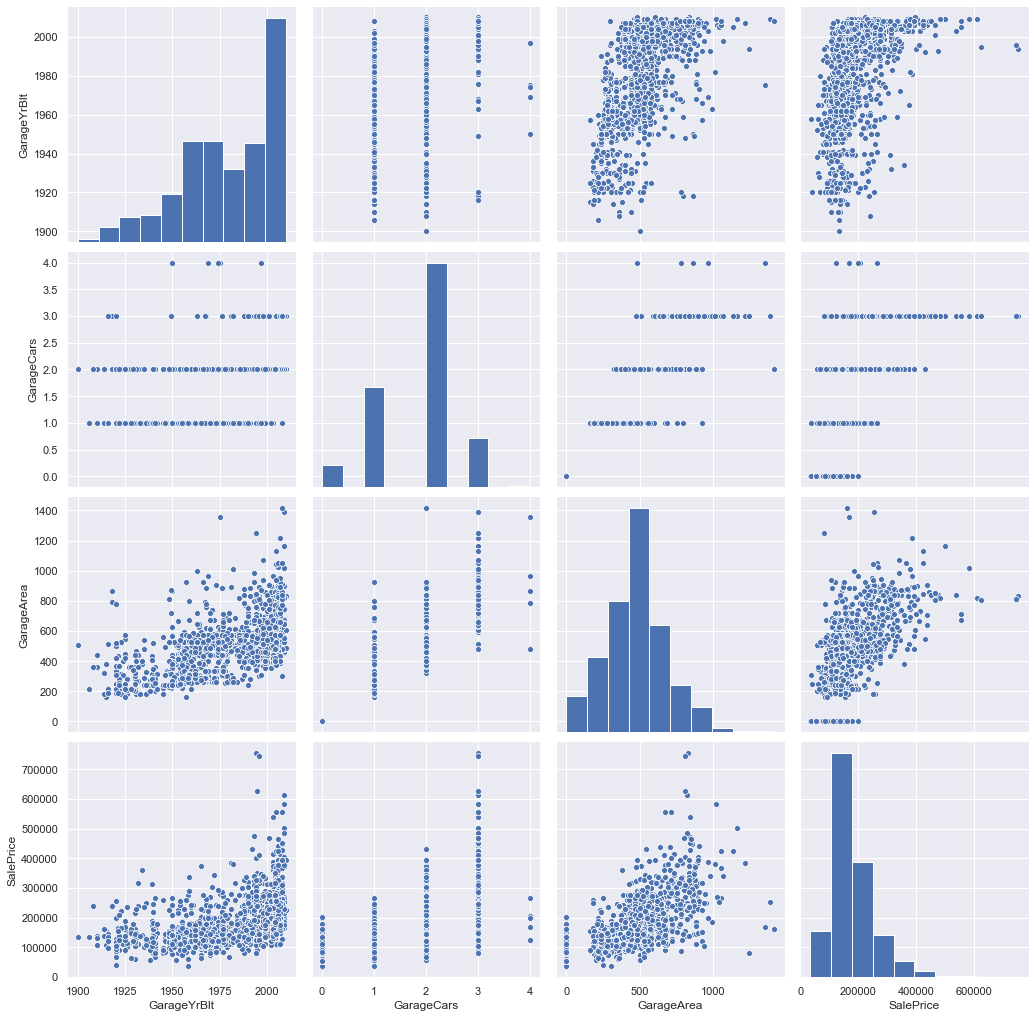

In [25]:
col7 = train_columns[sublist[7]:sublist[8]]
col7.append('SalePrice')

sns.set()
sns.pairplot(train_dataset[col7],size=3.5)

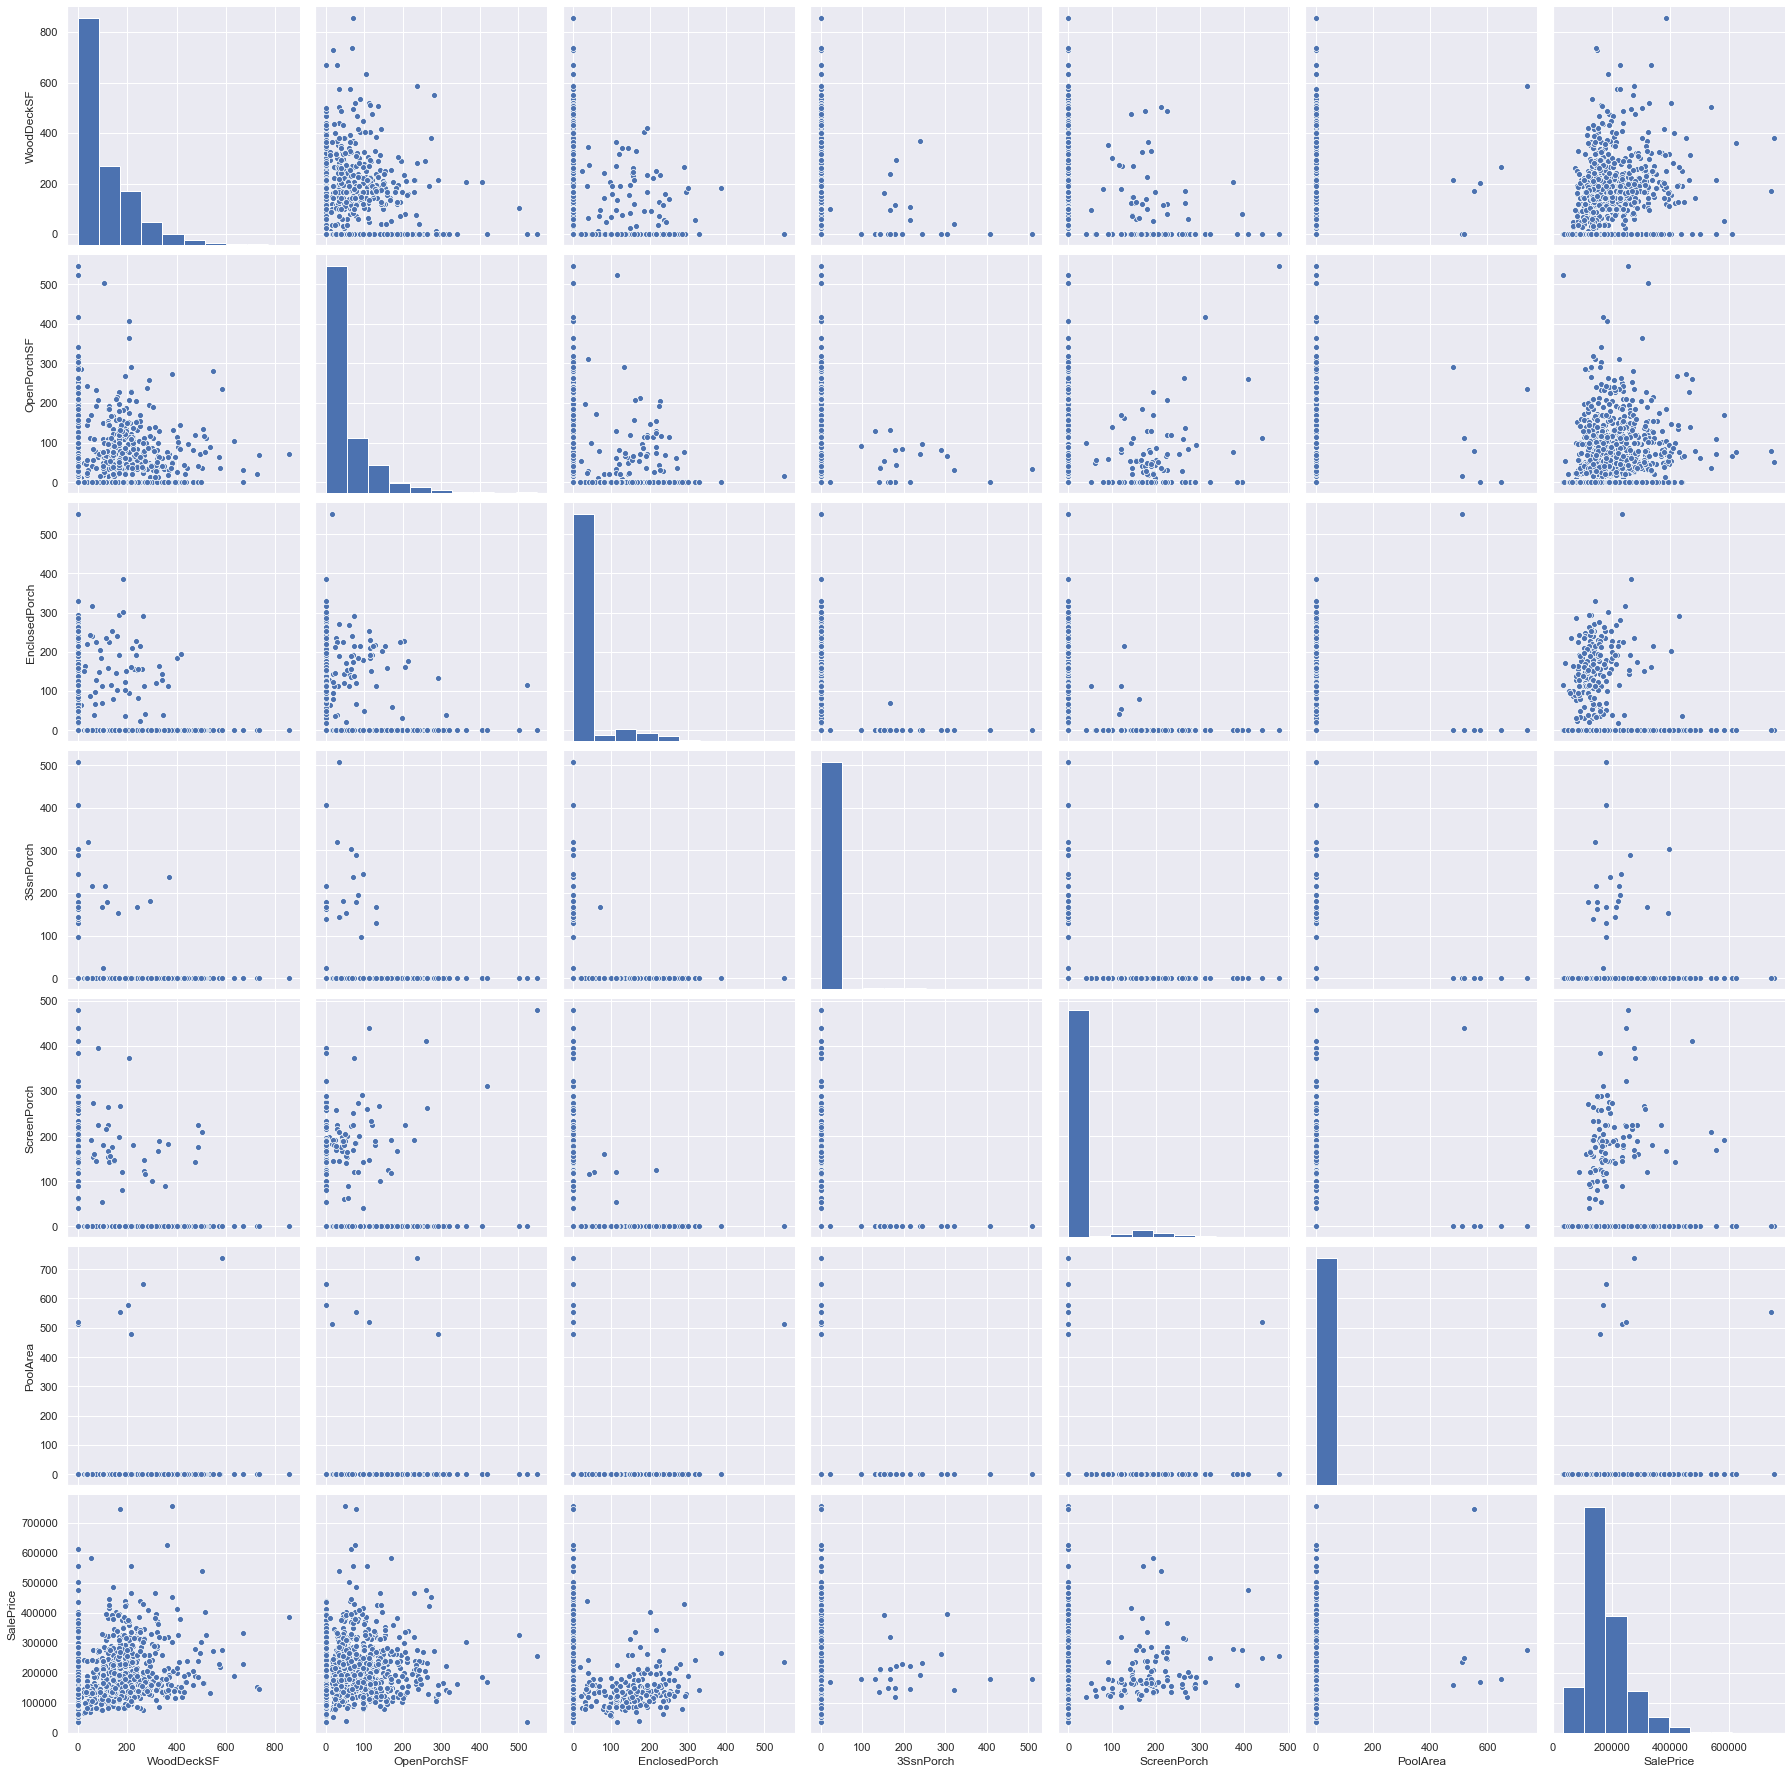

In [26]:
col8 = train_columns[sublist[8]:sublist[9]]
col8.append('SalePrice')

sns.set()
sns.pairplot(train_dataset[col8],size=3.5)

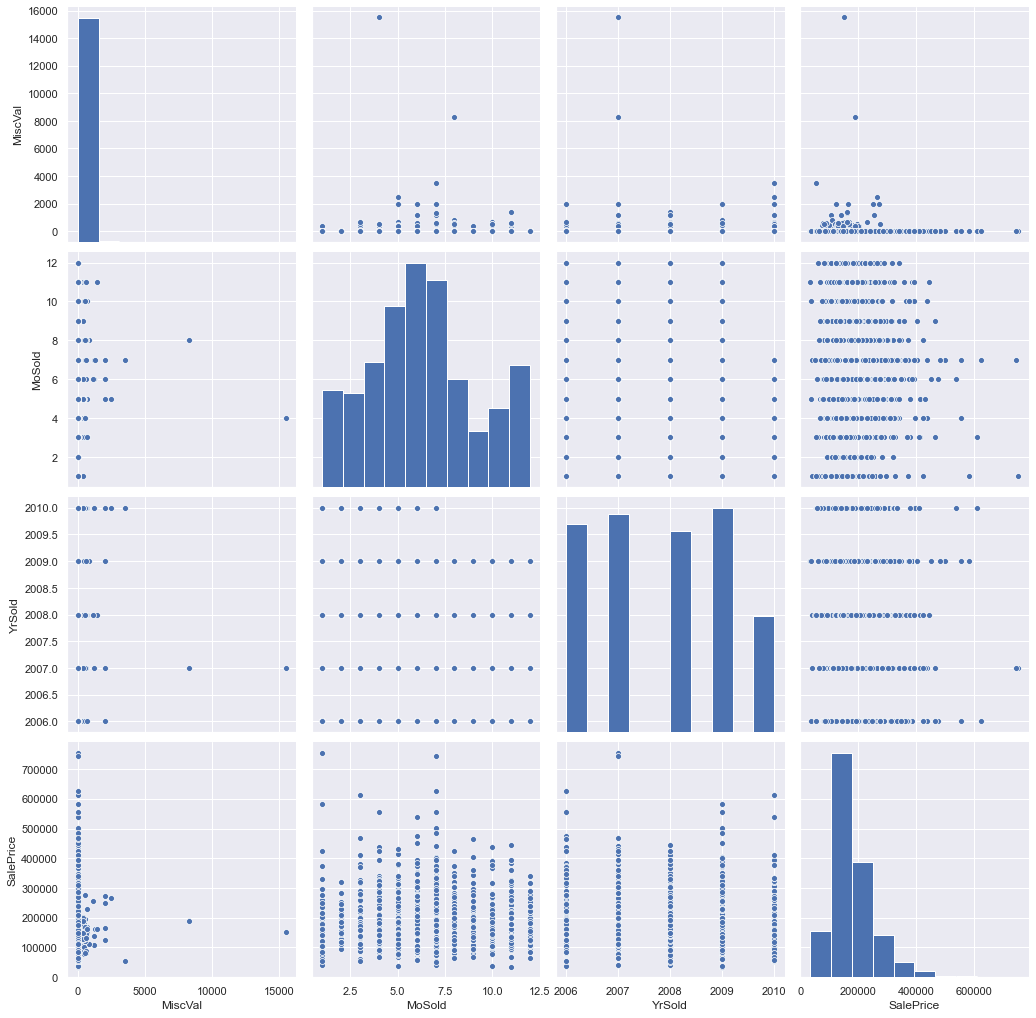

In [27]:
col9 = train_columns[sublist[9]:sublist[10]]

sns.set()
sns.pairplot(train_dataset[col9],size=3.5)

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

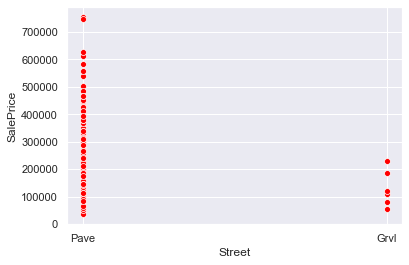

In [28]:
sns.scatterplot(train_dataset['Street'],train_dataset['SalePrice'],color="red")

<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

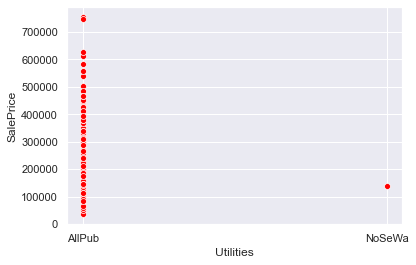

In [29]:
sns.scatterplot(train_dataset['Utilities'],train_dataset['SalePrice'],color="red")

In [30]:
train_dataset.Utilities.describe()

count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

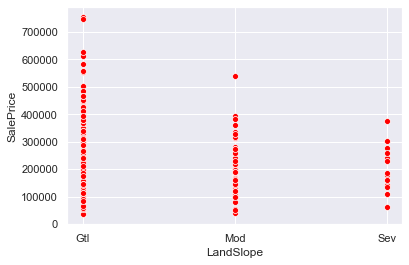

In [31]:
sns.scatterplot(train_dataset['LandSlope'],train_dataset['SalePrice'],color="red")

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

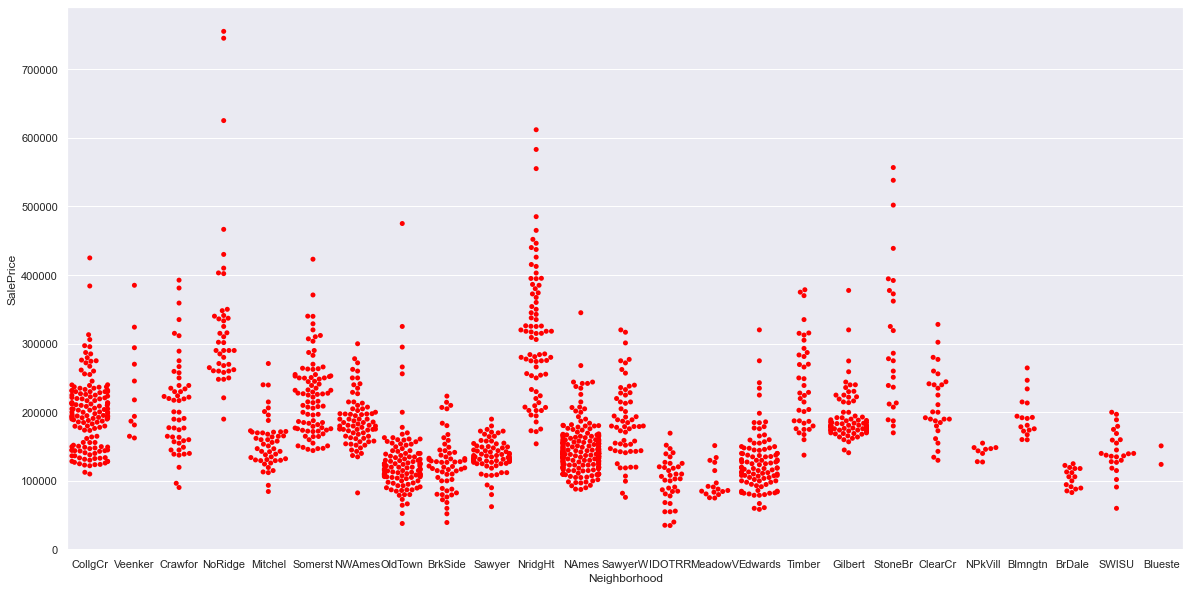

In [32]:
figure = plt.figure(figsize=(20,10))
sns.swarmplot(train_dataset['Neighborhood'],train_dataset['SalePrice'],color="red")

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

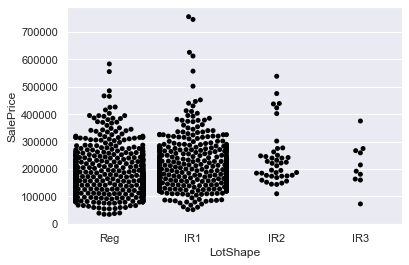

In [33]:
sns.swarmplot(train_dataset['LotShape'],train_dataset['SalePrice'],color="black")

In [34]:
sns.swarmplot(train_dataset['MSZoning'],train_dataset['SalePrice'],color="black")

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

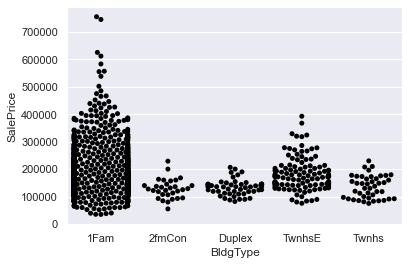

In [35]:
sns.swarmplot(train_dataset['BldgType'],train_dataset['SalePrice'],color="black")

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

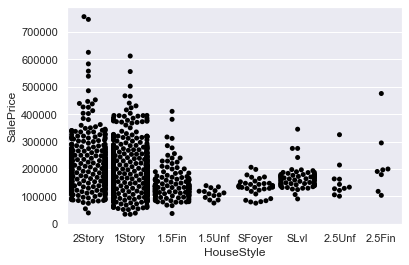

In [36]:
sns.swarmplot(train_dataset['HouseStyle'],train_dataset['SalePrice'],color="black")

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

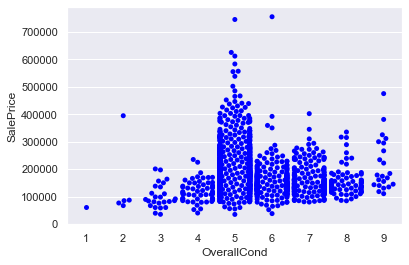

In [37]:
sns.swarmplot(train_dataset['OverallCond'],train_dataset['SalePrice'],color="blue")

In [38]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
train_dataset['RoofMatl'].value_counts(normalize=True).plot.bar(title="RoofMatl",color="lightblue")
for p in ax1.patches:
    ax1.annotate("{:.2%}".format(p.get_height()),xy=(p.get_x()+0.02, p.get_height()+0.01))
ax2 = fig.add_subplot(222)
sns.swarmplot(train_dataset['RoofMatl'],train_dataset['SalePrice'],color="red")

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

In [39]:
sns.regplot(x="MasVnrArea",y="SalePrice",data = train_dataset,scatter_kws={"color": "hotpink"}, line_kws={"color": "black"})

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

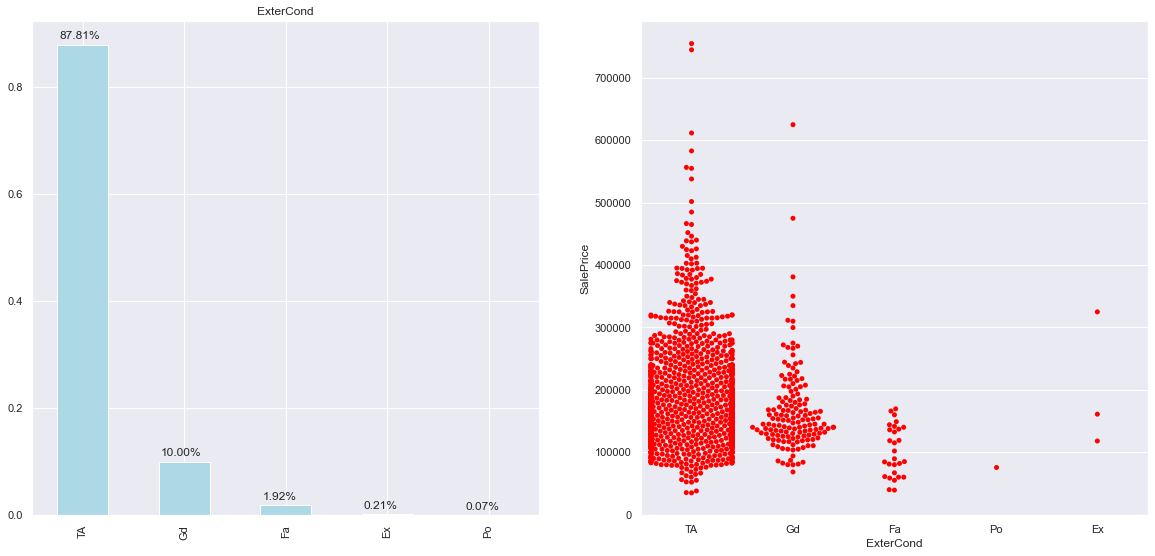

In [40]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
train_dataset['ExterCond'].value_counts(normalize=True).plot.bar(title="ExterCond",color="lightblue")
for p in ax1.patches:
    ax1.annotate("{:.2%}".format(p.get_height()),xy=(p.get_x()+0.02, p.get_height()+0.01))
ax2 = fig.add_subplot(222)
sns.swarmplot(train_dataset['ExterCond'],train_dataset['SalePrice'],color="red")

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

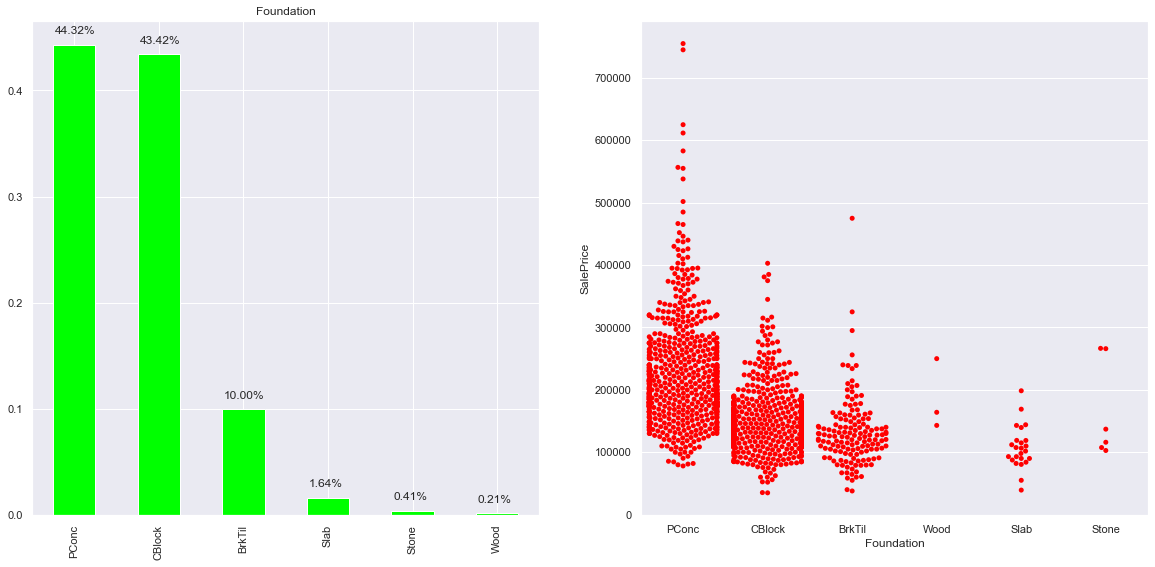

In [41]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
train_dataset['Foundation'].value_counts(normalize=True).plot.bar(title="Foundation",color="lime")
for p in ax1.patches:
    ax1.annotate("{:.2%}".format(p.get_height()),xy=(p.get_x()+0.02, p.get_height()+0.01))
ax2 = fig.add_subplot(222)
sns.swarmplot(train_dataset['Foundation'],train_dataset['SalePrice'],color="red")

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

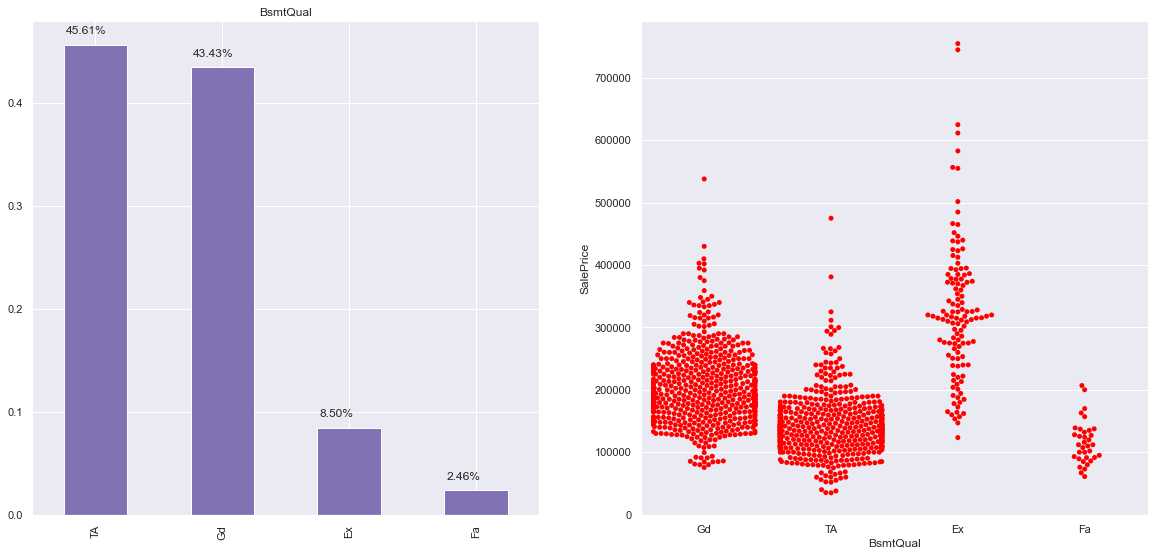

In [42]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
train_dataset['BsmtQual'].value_counts(normalize=True).plot.bar(title="BsmtQual",color="m")
for p in ax1.patches:
    ax1.annotate("{:.2%}".format(p.get_height()),xy=(p.get_x()+0.02, p.get_height()+0.01))
ax2 = fig.add_subplot(222)
sns.swarmplot(train_dataset['BsmtQual'],train_dataset['SalePrice'],color="red")

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

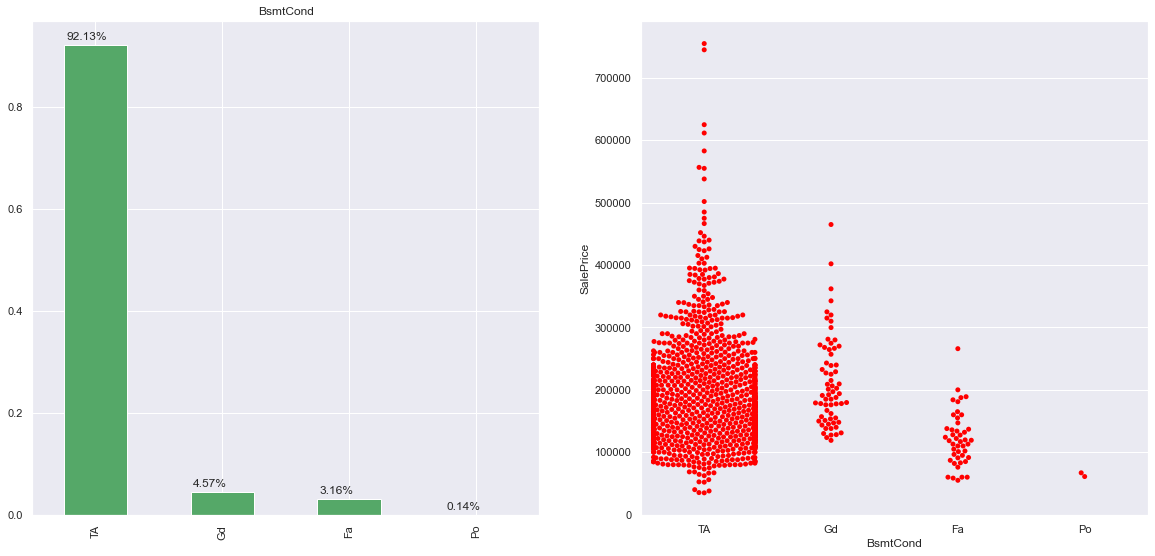

In [43]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
train_dataset['BsmtCond'].value_counts(normalize=True).plot.bar(title="BsmtCond",color="g")
for p in ax1.patches:
    ax1.annotate("{:.2%}".format(p.get_height()),xy=(p.get_x()+0.02, p.get_height()+0.01))
ax2 = fig.add_subplot(222)
sns.swarmplot(train_dataset['BsmtCond'],train_dataset['SalePrice'],color="red")

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

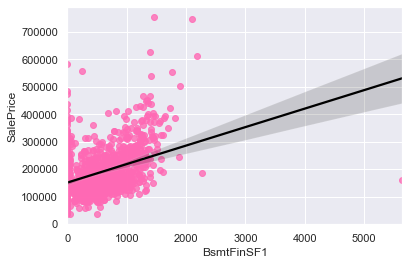

In [44]:
sns.regplot(x="BsmtFinSF1",y="SalePrice",data = train_dataset,scatter_kws={"color": "hotpink"}, line_kws={"color": "black"})

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

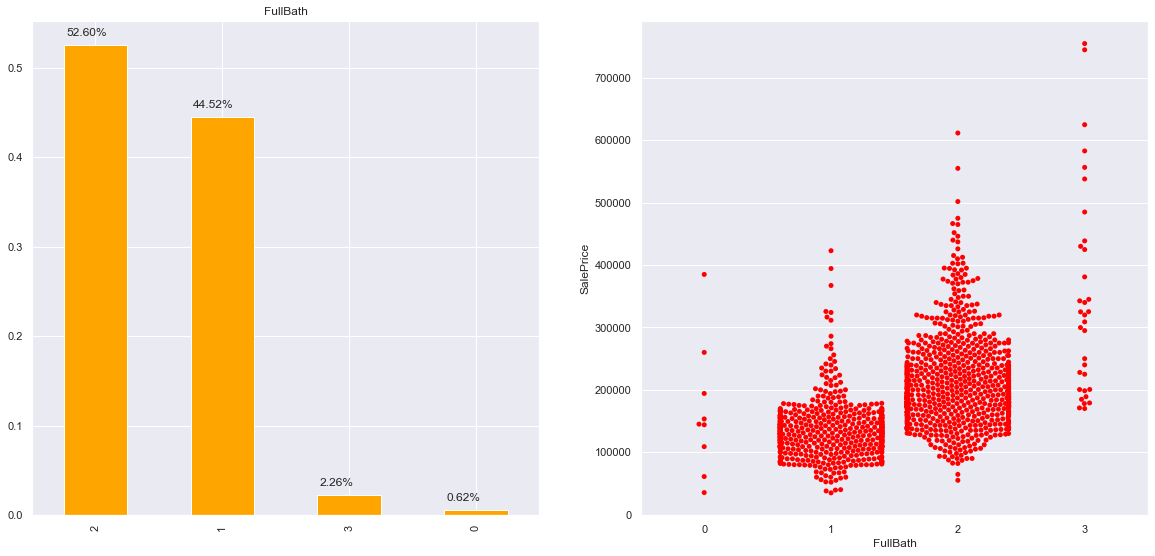

In [45]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
train_dataset['FullBath'].value_counts(normalize=True).plot.bar(title="FullBath",color="orange")
for p in ax1.patches:
    ax1.annotate("{:.2%}".format(p.get_height()),xy=(p.get_x()+0.02, p.get_height()+0.01))
ax2 = fig.add_subplot(222)
sns.swarmplot(train_dataset['FullBath'],train_dataset['SalePrice'],color="red")

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

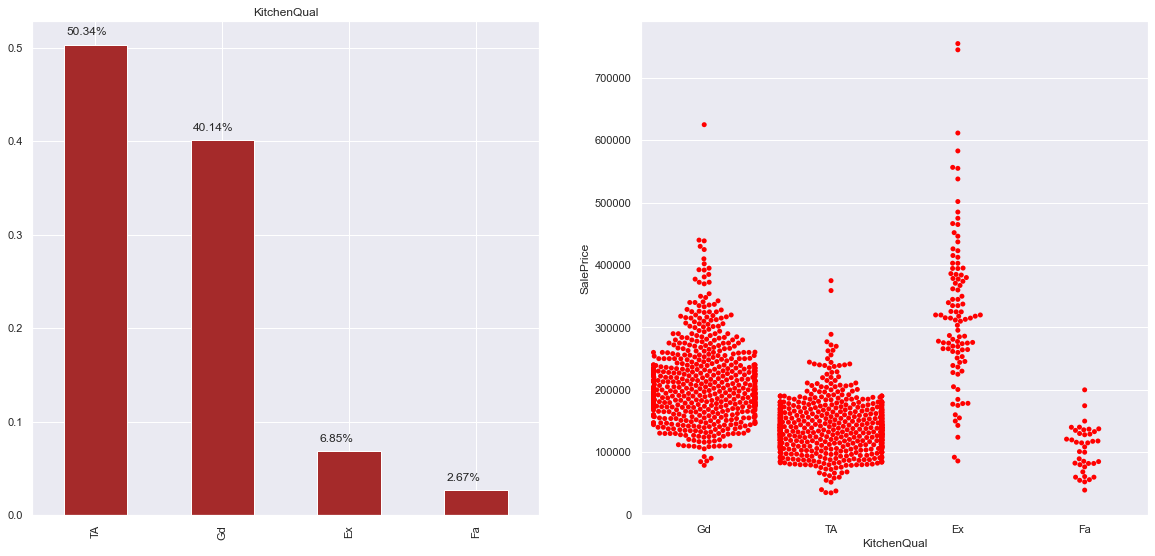

In [46]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
train_dataset['KitchenQual'].value_counts(normalize=True).plot.bar(title="KitchenQual",color="brown")
for p in ax1.patches:
    ax1.annotate("{:.2%}".format(p.get_height()),xy=(p.get_x()+0.02, p.get_height()+0.01))
ax2 = fig.add_subplot(222)
sns.swarmplot(train_dataset['KitchenQual'],train_dataset['SalePrice'],color="red")

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

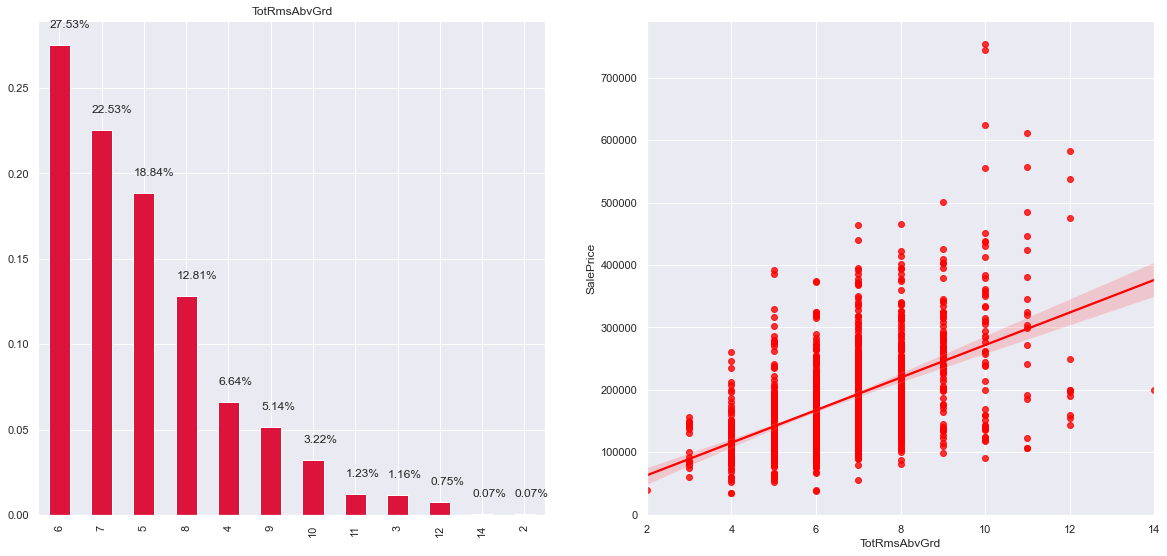

In [47]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
train_dataset['TotRmsAbvGrd'].value_counts(normalize=True).plot.bar(title="TotRmsAbvGrd",color="crimson")
for p in ax1.patches:
    ax1.annotate("{:.2%}".format(p.get_height()),xy=(p.get_x()+0.02, p.get_height()+0.01))
ax2 = fig.add_subplot(222)
sns.regplot(x= 'TotRmsAbvGrd',y= 'SalePrice',data=train_dataset,color="red")

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

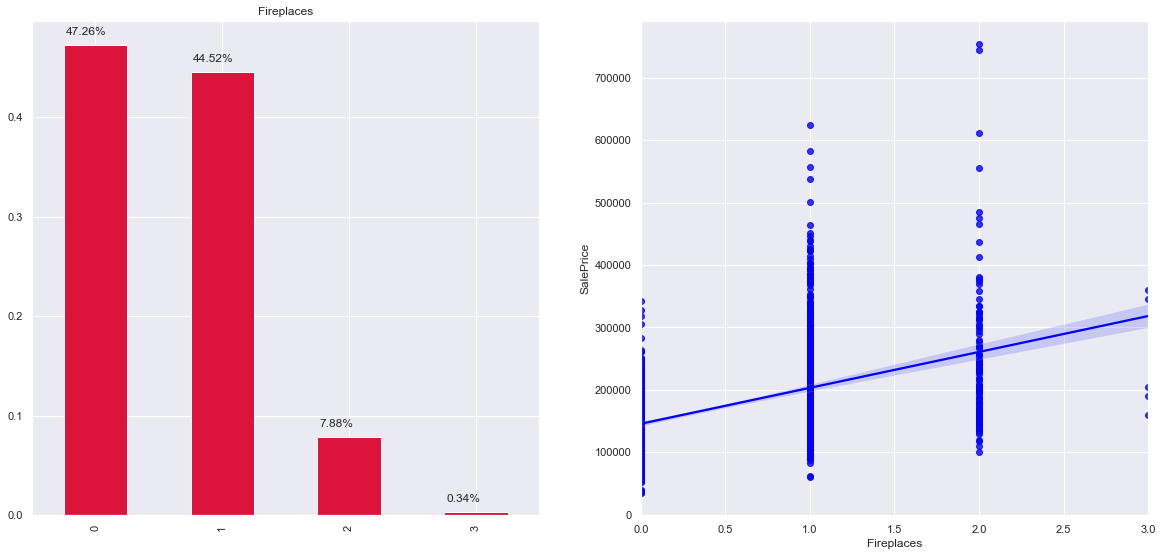

In [48]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
train_dataset['Fireplaces'].value_counts(normalize=True).plot.bar(title="Fireplaces",color="crimson")
for p in ax1.patches:
    ax1.annotate("{:.2%}".format(p.get_height()),xy=(p.get_x()+0.02, p.get_height()+0.01))
ax2 = fig.add_subplot(222)
sns.regplot(x= 'Fireplaces',y= 'SalePrice',data=train_dataset,color="blue") 

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

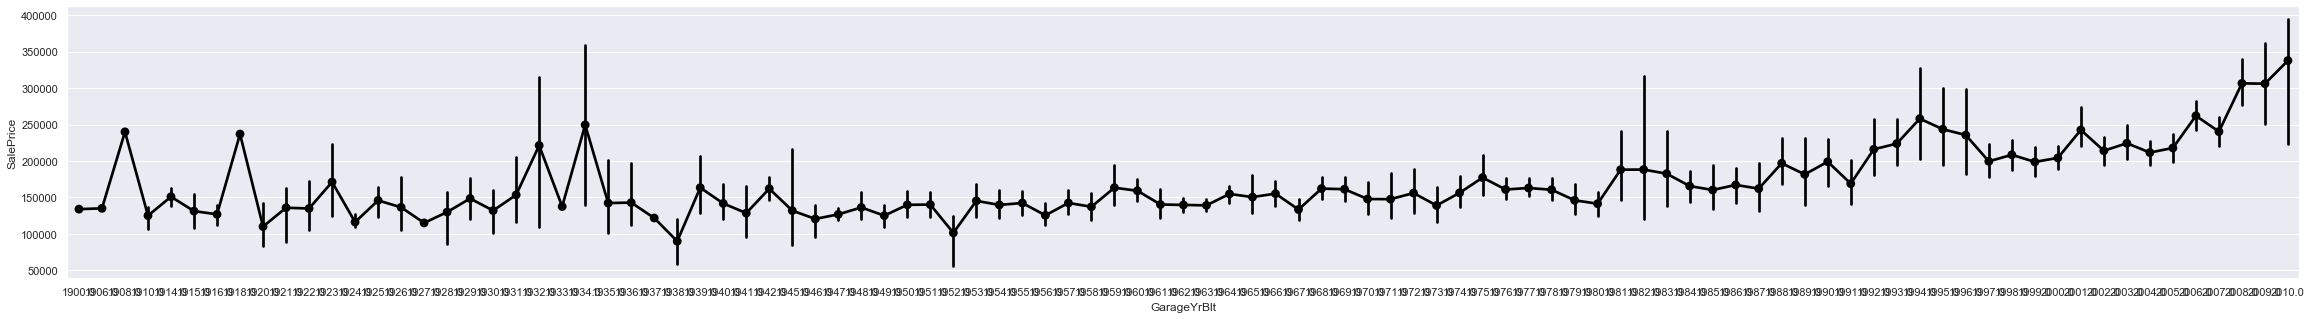

In [49]:
plt.figure(figsize=(40,5))
sns.pointplot(x="GarageYrBlt",y="SalePrice",data=train_dataset,color="black")

In [50]:
sns.regplot(x="GarageCars",y="SalePrice",data = train_dataset,scatter_kws={"color": "hotpink"}, line_kws={"color": "black"})

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

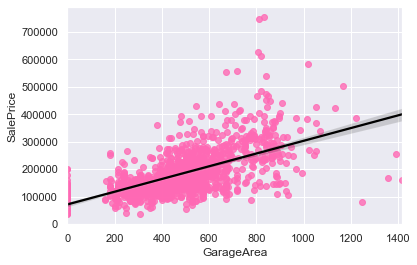

In [51]:
sns.regplot(x="GarageArea",y="SalePrice",data = train_dataset,scatter_kws={"color": "hotpink"}, line_kws={"color": "black"})

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

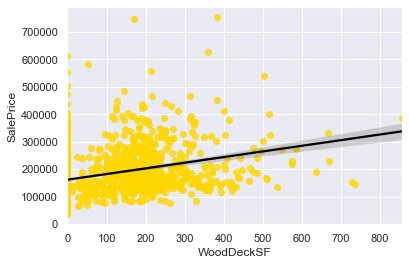

In [52]:
sns.regplot(x="WoodDeckSF",y="SalePrice",data = train_dataset,scatter_kws={"color": "gold"}, line_kws={"color": "black"})

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

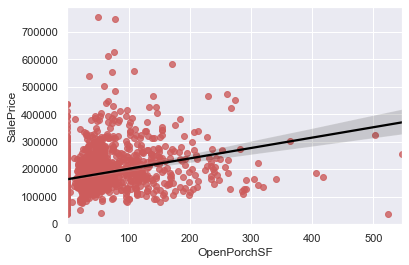

In [53]:
sns.regplot(x="OpenPorchSF",y="SalePrice",data = train_dataset,scatter_kws={"color": "indianred"}, line_kws={"color": "black"})

# Null Filling

In [54]:
def nullpercent(variable,cols):
    numerator = variable.isna().sum()
    denominator = variable.shape[0]
    percentage_result = round(((numerator/denominator)*100),2)
    print(f'{cols} == {percentage_result}%')

print(f'Percentage of null values in train dataframe')
print(f'Columns || Percentage')
for ctr in train_columns:
    train_feature = train_dataset[ctr]
    nullpercent(train_feature,ctr)

Percentage of null values in train dataframe
Columns || Percentage
Id == 0.0%
MSSubClass == 0.0%
MSZoning == 0.0%
LotFrontage == 17.74%
LotArea == 0.0%
Street == 0.0%
Alley == 93.77%
LotShape == 0.0%
LandContour == 0.0%
Utilities == 0.0%
LotConfig == 0.0%
LandSlope == 0.0%
Neighborhood == 0.0%
Condition1 == 0.0%
Condition2 == 0.0%
BldgType == 0.0%
HouseStyle == 0.0%
OverallQual == 0.0%
OverallCond == 0.0%
YearBuilt == 0.0%
YearRemodAdd == 0.0%
RoofStyle == 0.0%
RoofMatl == 0.0%
Exterior1st == 0.0%
Exterior2nd == 0.0%
MasVnrType == 0.55%
MasVnrArea == 0.55%
ExterQual == 0.0%
ExterCond == 0.0%
Foundation == 0.0%
BsmtQual == 2.53%
BsmtCond == 2.53%
BsmtExposure == 2.6%
BsmtFinType1 == 2.53%
BsmtFinSF1 == 0.0%
BsmtFinType2 == 2.6%
BsmtFinSF2 == 0.0%
BsmtUnfSF == 0.0%
TotalBsmtSF == 0.0%
Heating == 0.0%
HeatingQC == 0.0%
CentralAir == 0.0%
Electrical == 0.07%
1stFlrSF == 0.0%
2ndFlrSF == 0.0%
LowQualFinSF == 0.0%
GrLivArea == 0.0%
BsmtFullBath == 0.0%
BsmtHalfBath == 0.0%
FullBath == 0.0%
H

In [55]:
test_columns = test_dataset.columns.tolist()

print(f'percentage of null values in test dataframe')
print(f'Columns || Percentage')
for cte in test_columns:
    test_feature = test_dataset[cte]
    nullpercent(test_feature,cte)

percentage of null values in test dataframe
Columns || Percentage
Id == 0.0%
MSSubClass == 0.0%
MSZoning == 0.27%
LotFrontage == 15.56%
LotArea == 0.0%
Street == 0.0%
Alley == 92.67%
LotShape == 0.0%
LandContour == 0.0%
Utilities == 0.14%
LotConfig == 0.0%
LandSlope == 0.0%
Neighborhood == 0.0%
Condition1 == 0.0%
Condition2 == 0.0%
BldgType == 0.0%
HouseStyle == 0.0%
OverallQual == 0.0%
OverallCond == 0.0%
YearBuilt == 0.0%
YearRemodAdd == 0.0%
RoofStyle == 0.0%
RoofMatl == 0.0%
Exterior1st == 0.07%
Exterior2nd == 0.07%
MasVnrType == 1.1%
MasVnrArea == 1.03%
ExterQual == 0.0%
ExterCond == 0.0%
Foundation == 0.0%
BsmtQual == 3.02%
BsmtCond == 3.08%
BsmtExposure == 3.02%
BsmtFinType1 == 2.88%
BsmtFinSF1 == 0.07%
BsmtFinType2 == 2.88%
BsmtFinSF2 == 0.07%
BsmtUnfSF == 0.07%
TotalBsmtSF == 0.07%
Heating == 0.0%
HeatingQC == 0.0%
CentralAir == 0.0%
Electrical == 0.0%
1stFlrSF == 0.0%
2ndFlrSF == 0.0%
LowQualFinSF == 0.0%
GrLivArea == 0.0%
BsmtFullBath == 0.14%
BsmtHalfBath == 0.14%
FullBath 

In [56]:
drop_cols1 = ['Alley','PoolQC','Fence','MiscFeature','BsmtFinSF2']

In [57]:
for i in datasets:
    for j in drop_cols1:
        i.drop(j,axis=1,inplace=True)

In [58]:
for i in datasets:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [59]:
null_cols_train = [i for i in train_dataset if train_dataset[i].isnull().any()]
null_cols_train
null_cols_test = [j for j in test_dataset if test_dataset[j].isnull().any()]
null_cols_test

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [60]:
for i in null_cols_train:
    if train_dataset[i].dtype == "O":
        train_dataset[i].fillna(train_dataset[i].mode()[0], inplace=True)
        test_dataset[i].fillna(train_dataset[i].mode()[0], inplace=True)
    else:
        train_dataset[i].fillna(train_dataset[i].mean(), inplace=True)
        test_dataset[i].fillna(train_dataset[i].mean(), inplace=True)

for i in null_cols_test:
    if train_dataset[i].dtype == "O":
        train_dataset[i].fillna(train_dataset[i].mode()[0], inplace=True)
        test_dataset[i].fillna(train_dataset[i].mode()[0], inplace=True)
    else:
        train_dataset[i].fillna(train_dataset[i].mean(), inplace=True)
        test_dataset[i].fillna(train_dataset[i].mean(), inplace=True)

In [61]:
for i in datasets:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [62]:
for i in datasets:
    i['MSZoning'] = i['MSZoning'].map(lambda x: x.rstrip(' (all)'))

In [63]:
test_dataset.MSZoning.value_counts()

RL    1118
RM     242
FV      74
C       15
RH      10
Name: MSZoning, dtype: int64

In [64]:
train_dataset.SalePrice.value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
          ..
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

# Outlier Treatment

In [65]:
dataset = [train_dataset,test_dataset]
target = train_dataset['SalePrice']

train_columns_outreat = train_dataset.columns.to_list()


col_to_drop = ["YearBuilt","YrSold","GarageYrBlt","KitchenAbvGr","YearRemodAdd","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd","Fireplaces","GarageCars"]


outliers_columns = []
for feature in train_columns_outreat:
    if ((train_dataset[feature].dtypes != "O")):
        outliers_columns.append(feature)

outliers_columns.remove('Id')
outliers_columns.remove('SalePrice')


def outliers_doctor_train(variable):
    quartile1= train_dataset[variable].quantile(0.25)
    quartile3= train_dataset[variable].quantile(0.75)
    IQR = quartile3-quartile1
    upperwhisker = 1.5*quartile3
    lowerwhisker = 1.5*quartile1
    train_dataset[variable] = np.where(train_dataset[variable]>upperwhisker,quartile3,train_dataset[variable])
    train_dataset[variable] = np.where(train_dataset[variable]<lowerwhisker,quartile1,train_dataset[variable])

def outliers_doctor_test(variable):
    quartile1 = test_dataset[variable].quantile(0.25)
    quartile3 = test_dataset[variable].quantile(0.75)
    IQR = quartile3-quartile1
    upperwhisker = 1.5*quartile3
    lowerwhisker = 1.5*quartile1
    test_dataset[variable] = np.where(test_dataset[variable]>upperwhisker,quartile3,test_dataset[variable])
    test_dataset[variable] = np.where(test_dataset[variable]<lowerwhisker,quartile1,test_dataset[variable])


for j in outliers_columns:
    outliers_doctor_train(j)
    outliers_doctor_test(j) 

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold


140000    20
135000    17
145000    14
155000    14
190000    13
          ..
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

# Feature Extraction

In [68]:
dataset = [train_dataset,test_dataset]
for df in dataset:
    df['Roofadv'] = np.where(((df['RoofStyle'] == 'Hip') & ((df['RoofMatl'] == 'CompShg') | (df['RoofMatl'] == 'WdShngl'))),1,0)
    df['Bsmtadv'] = np.where((df['BsmtCond'] =='Gd') & (df['BsmtQual'] == 'Ex'),1,0)
    df['Basegroudiff'] = np.where((df['GrLivArea'] > df['TotalBsmtSF']),1,0)
    df['ExtraRmsAbvgr'] = df['TotRmsAbvGrd'] - df['BedroomAbvGr']
    df['TotFullBath'] = df['BsmtFullBath'] + df['FullBath']
    df['TotHalfBath'] = df['BsmtHalfBath'] + df['HalfBath']
    df['Garageadv'] = np.where((df['GarageFinish'] == 'Fin') & (df['GarageCars'] == 4),1,0)
    df['TotalPorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
    df['YrMoSoldAdv'] = np.where((df['MoSold'] == 9.0) & (df['YrSold'] == 2007),1,0)

In [69]:
target = train_dataset['SalePrice']
train_dataset.drop('SalePrice',axis=1,inplace=True)

# One Hot Encoding

In [71]:
train_columns = train_dataset.columns
train_cat_cols = []
for i in train_columns:
    if (train_dataset[i].dtypes == "O"):
        train_cat_cols.append(i)

test_columns = test_dataset.columns
test_cat_cols = []
for i in test_columns:
    if (test_dataset[i].dtypes == "O"):
        test_cat_cols.append(i)

In [72]:
train_cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [73]:
train_dataset[train_cat_cols].describe()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1460   1460     1460        1460      1460      1460      1460   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1151   1454      925        1311      1459      1052      1382   

       Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
count          1460       1460       1460  ...        1460       1460   
unique           25          9          8  ...           4          7   
top           NAmes       Norm       Norm  ...          TA        Typ   
freq            225       1260       1445  ...         735       1360   

       FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count         1460       1460         1460       1460       1460       1460   
unique           5          6            3          5          5          3   
top             Gd     Attchd          Unf         TA         TA          Y   
freq          1070        951          686       1392       1407       1340   

       SaleType SaleCondition  
count      1460          1460  
unique        9             6  
top          WD        Normal  
freq       1267          1198  

[4 rows x 39 columns]

In [74]:
train_cat_df = train_dataset[train_cat_cols]
test_cat_df = test_dataset[test_cat_cols]

In [75]:
datasets = [train_dataset,test_dataset]


dummy_cat_train = pd.get_dummies(train_cat_df, drop_first=True)

dummy_cat_test = pd.get_dummies(test_cat_df, drop_first=True)

for i in datasets:
    for j in train_cat_cols:
        i.drop([j], axis=1, inplace=True)

train_dataset = pd.concat([train_dataset,dummy_cat_train],axis=1)
test_dataset = pd.concat([test_dataset,dummy_cat_test],axis=1)

In [76]:
test_col_afohe = test_dataset.columns.tolist()
train_col_afohe = train_dataset.columns.tolist()

drop_col_afot = []
for i in train_col_afohe:
    if (i not in test_col_afohe):
        drop_col_afot.append(i)

In [77]:
drop_col_afot

['Utilities_NoSeWa',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_GasA',
 'Heating_OthW',
 'Electrical_Mix',
 'GarageQual_Fa']

In [78]:
for j in drop_col_afot:
    train_dataset.drop(j,axis=1,inplace=True)

# Feature Selection and Predictive Model 

In [79]:
target_val = target.values
train_dataset['SalePrice'] = target_val

predictor = train_dataset.iloc[:,0:229]

target = train_dataset.iloc[:,229]

num_feat_plot = []
model_r2_acc_plot = []


#linear_cv_model = LinearRegression()
randformode_cv = RandomForestRegressor()


number_of_feat = 44 #44 numbers of features gives the best results.
#rfe = RFE(linear_cv_model,number_of_feat)
rfe = RFE(randformode_cv,number_of_feat)
fit = rfe.fit(predictor,target)
num_features = fit.n_features_
features = fit.ranking_.tolist()
arr = np.array(features)
bool_arr = arr == 1
output_feature_index = np.where(bool_arr)[0]
train_columns = train_dataset.columns
selected_features = []
for j in output_feature_index:
    for index,k in enumerate(train_columns): 
        if (index == j):
            selected_features.append(k)
train_df = train_dataset.copy()
test_df = test_dataset.copy()
train_df_cols = train_df.columns.tolist()
train_df_cols.remove('SalePrice')
drop_cols = np.setdiff1d(train_df_cols,selected_features)
dataset_df = [train_df,test_df]
for l in dataset_df:
    for z in drop_cols:
        l.drop(columns=[z],axis=1,inplace=True)
#linear_model = LinearRegression()
randformode_hpt = RandomForestRegressor()
X = train_df.iloc[:,0:num_features]
Y = train_df.iloc[:,num_features]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20,random_state = 145)
param_rand_rf = {"n_estimators": [int(b) for b in np.linspace(100,1000,10)],
            "max_features":['auto', 'sqrt'],
             "min_samples_split": [int (y) for y in np.linspace(2,10,5)],
             "min_samples_leaf" : [1,2,3],
             "bootstrap" : [True,False]
            }
randfor_cv = RandomizedSearchCV(estimator=randformode_hpt,param_distributions=param_rand_rf,cv=3,verbose=2,random_state=123,n_jobs=-1)
best_rfpc = randfor_cv.fit(X,Y)
print("Random Forest Parameter Combination: ", best_rfpc.best_estimator_)
randmodewithpt = best_rfpc.best_estimator_
randformode = randmodewithpt
#trained_model = linear_model.fit(X_train,Y_train)
trained_model = randformode.fit(X_train,Y_train)
pred = trained_model.predict(X_test)
print("Num Features: %s" % (fit.n_features_))
r2score_value = round(r2_score(Y_test,pred),2)*100
print("r2_score: {} %".format(r2score_value))
mean_square_error = round(mean_squared_error(Y_test, pred),2)
print("Mean Squared Error:",round(mean_squared_error(Y_test, pred),2))

c:\users\saravanan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=44 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   19.2s finished


Random Forest Parameter Combination:  RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=3,
                      n_estimators=300)
Num Features: 44
r2_score: 85.0 %
Mean Squared Error: 941968194.36


In [86]:
train_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'ExtraRmsAbvgr', 'TotFullBath', 'TotHalfBath',
       'TotalPorchArea', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_Reg',
       'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Exterior1st_HdBoard',
       'Exterior2nd_HdBoard', 'ExterQual_Gd', 'ExterQual_TA', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'CentralAir_Y', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_Attchd', 'GarageFinish_Unf',
       'SaleType_New', 'SalePrice'],
      dtype='object')

# For Kaggle

In [85]:
randmodekag = best_rfpc.best_estimator_
trained_model_kag = randformode.fit(X,Y)
test_df_id = test_df['Id']
kaggle_pred = trained_model.predict(test_df)
submission = pd.DataFrame({'Id': test_df_id, 'SalePrice': kaggle_pred})
submission.to_csv('HousePricePrediction.csv',index=False) 